# Return distribution
Testing the distribution of returns for a given financial asset to see if it really is approximately normal with mean zero.

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [5]:
# Download S&P 500 historical data from Yahoo Finance if not already downloaded
path = "data/sp500.csv"
if not os.path.exists(path):
    os.makedirs("data", exist_ok=True)
    data = yf.download("^GSPC", start="1962-01-01", end="2023-01-01")

    if isinstance(data.columns, pd.MultiIndex):
        data.columns = [c[0] for c in data.columns]  # or c[1] for the second level
        # another option:  data.columns = ['_'.join(c).strip() for c in data.columns]

    # Optional: put Date as a normal column instead of index
    data.reset_index(inplace=True)

    data.to_csv(path, index=False)
else:
    data = pd.read_csv("data/sp500.csv")

data.head()

,Date,Close,High,Low,Open,Volume
0,1962-01-02,70.959999,71.959999,70.709999,71.550003,3120000
1,1962-01-03,71.129997,71.480003,70.379997,70.959999,3590000
2,1962-01-04,70.639999,71.620003,70.449997,71.129997,4450000
3,1962-01-05,69.660004,70.839996,69.349998,70.639999,4630000
4,1962-01-08,69.120003,69.839996,68.169998,69.660004,4620000


In [6]:
# Calculate daily log returns
data['LogReturn'] = (data['Close'] / data['Close'].shift(1)).apply(lambda x: np.log(x))
data = data.dropna()
data.head()

,Date,Close,High,Low,Open,Volume,LogReturn
1,1962-01-03,71.129997,71.480003,70.379997,70.959999,3590000,0.002393
2,1962-01-04,70.639999,71.620003,70.449997,71.129997,4450000,-0.006913
3,1962-01-05,69.660004,70.839996,69.349998,70.639999,4630000,-0.013970
4,1962-01-08,69.120003,69.839996,68.169998,69.660004,4620000,-0.007782
5,1962-01-09,69.150002,69.930000,68.830002,69.120003,3600000,0.000434


In [8]:
# Some basic statistics
print("Mean Log Return:", data['LogReturn'].mean())
print("Standard Deviation of Log Return:", data['LogReturn'].std())

Mean Log Return: 0.00025991410639344134
Standard Deviation of Log Return: 0.01045953187688658


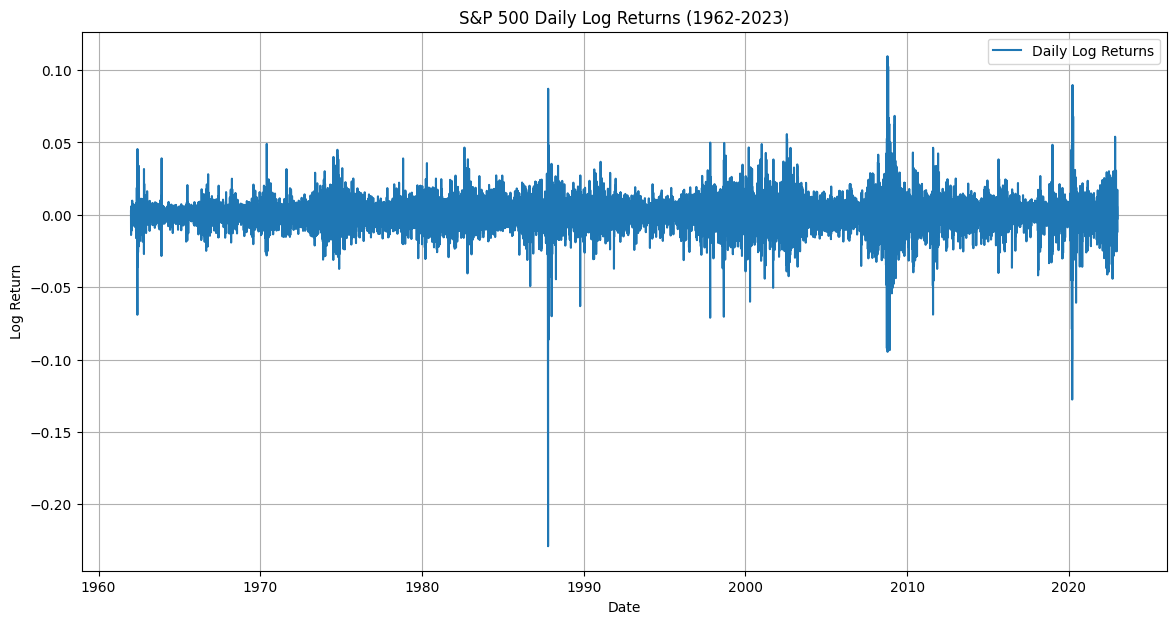

In [10]:
# Plot the returns over time
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['LogReturn'], label='Daily Log Returns')
plt.title('S&P 500 Daily Log Returns (1962-2023)')
plt.xlabel('Date')
plt.ylabel('Log Return')
plt.legend()
plt.grid()
plt.show()

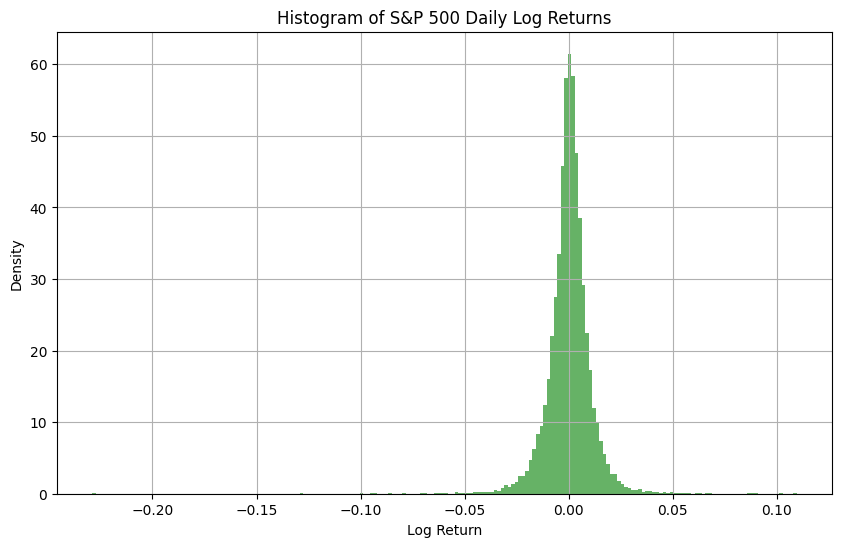

In [16]:
# Plot the histogram distribution of returns
plt.figure(figsize=(10, 6))
plt.hist(data['LogReturn'].dropna(), bins=200, density=True, alpha=0.6, color='g')
plt.title('Histogram of S&P 500 Daily Log Returns')
plt.xlabel('Log Return')
plt.ylabel('Density')
plt.grid()
plt.show()